In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import keras
from keras import backend as K
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
print(tf.__version__)
print(keras.__version__)
from keras.models import Sequential
from keras.layers import Conv2D, Conv1D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from keras.layers.advanced_activations import LeakyReLU
import os 
import cv2
import pickle

Using TensorFlow backend.


1.14.0
2.2.4


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
pickle_in = open("/content/drive/My Drive/X.pickle_encasa", "rb")
X = pickle.load(pickle_in)

pickle_y_in = open("/content/drive/My Drive/y.pickle_encasa", "rb")
y = pickle.load(pickle_y_in)

In [0]:
X=X/255.

In [0]:
y = tf.keras.utils.to_categorical(y)

In [0]:
import sklearn.model_selection as model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.9,test_size=0.1, random_state=101)

In [6]:
X_train.shape

(1474, 200, 200, 1)

In [7]:
y_train.shape

(1474, 4)

In [0]:
datagen = ImageDataGenerator(
        rescale=1./255,
        #shear_range=0.2,
        #zoom_range=0.2,
        #horizontal_flip=True)
        featurewise_center=False,               # se pone la media a 0 en todo el dataset
        samplewise_center=False,                # se pone la media a 0 de la muestra
        featurewise_std_normalization=False,    # se divide entre la std del dataset
        samplewise_std_normalization=False,     # se divide cada entrada entre std
        zca_whitening=False,                    # ZCA whitening, reduccion de dimensiones (similar a PCA)
        rotation_range=15,                      # se rotan las imagenes aleatoriamente (de 0 a 180 grados)
        zoom_range=0.1,                         # zoom aleatorio 
        width_shift_range=0.1,                  # cambio aleatorio horizontal (fraccion del ancho total)
        height_shift_range=0.1,                 # cambio aleatorio vertical (fraccion de la altura total)
        horizontal_flip=False,                  # giro aleatorio horizantal                           
        vertical_flip=False)   

In [0]:
dim_input = (200, 200, 1)
n_clases = 4

In [0]:
def make_model ():
  
    model = Sequential()
    
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=dim_input))
    
    model.add(MaxPooling2D(2, 2))    
        
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))

    model.add(MaxPooling2D(2, 2))

    model.add(Dropout(0.2))

    #model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))

    model.add(MaxPooling2D(2, 2))
    
    model.add(Dropout(0.25))
       
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))

    model.add(MaxPooling2D(2, 2))
    
    model.add(Dropout(0.2))    

    model.add(Flatten())

    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))

    model.add(Dropout(0.2))    

    model.add(Dense(n_clases, activation='softmax'))
              
    return model

In [0]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(200, 200, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=4, activation='softmax'))
model.compile(
   loss='categorical_crossentropy',
   optimizer=keras.optimizers.Adadelta(),
   metrics=['accuracy'])

In [10]:
model = make_model()
model.summary()

NameError: ignored

In [0]:
INIT_LR = 5e-3  # initial learning rate
BATCH_SIZE = 12
#EPOCHS = 25

In [0]:
model.compile(
    loss='categorical_crossentropy',  # we train 10-way classification
    optimizer=keras.optimizers.Adadelta(),  # for SGD
    metrics=['accuracy']  # report accuracy during training
)


W0806 20:34:49.152434 139911743567744 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0806 20:34:49.160035 139911743567744 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [13]:
modelaso = model.fit(X_train, y_train, epochs=50, batch_size=64)

modelaso

W0806 23:28:14.410204 140688113575808 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/50
1474/1474 [==============================] - 11s 8ms/step - loss: 5.0998 - acc: 0.2551
Epoch 2/50
1474/1474 [==============================] - 4s 3ms/step - loss: 1.3662 - acc: 0.3392
Epoch 3/50
1474/1474 [==============================] - 4s 3ms/step - loss: 1.3149 - acc: 0.6079
Epoch 4/50
1474/1474 [==============================] - 4s 3ms/step - loss: 0.7222 - acc: 0.8134
Epoch 5/50
1474/1474 [==============================] - 4s 3ms/step - loss: 0.1365 - acc: 0.9756
Epoch 6/50
1474/1474 [==============================] - 4s 3ms/step - loss: 0.0484 - acc: 0.9898
Epoch 7/50
1474/1474 [==============================] - 4s 3ms/step - loss: 0.0146 - acc: 0.9993
Epoch 8/50
1474/1474 [==============================] - 4s 3ms/step - loss: 0.0066 - acc: 0.9993
Epoch 9/50
1474/1474 [==============================] - 4s 3ms/step - loss: 0.0458 - acc: 0.9858
Epoch 10/50
1474/1474 [==============================] - 4s 3ms/step - loss: 0.0044 - acc: 1.0000
Epoch 11/50
1408/1474 [=====

KeyboardInterrupt: ignored

In [14]:
loss, acc=model.evaluate(X_test,y_test)
print(loss,acc)

164/164 [==============================] - 0s 2ms/step
0.0037575397617751506 1.0


In [0]:
y_pred = model.predict(X_test)

In [0]:
from sklearn.metrics import confusion_matrix


In [0]:
labels = {
    0:'Amstel',
    1:'Budweiser',
    2:'Cruzcampo',
    3:'Estrella_damm',
    4:'Estrella_galicia',
    5:'Franziskaner',
    6:'Heineken',
    7:'Mahou',
    8:'Pilsen_urquell',
    9:'San_miguel'
}

In [0]:
labels = ['Amstel', 'Budweiser', 'Cruzcampo', 'Estrella_damm', 'Estrella_galicia', 'Franziskaner', 'Heineken', 'Mahou', 'Pilsen_urquell', 'San_miguel']

In [17]:
matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
matrix

array([[43,  0,  0,  0],
       [ 0, 40,  0,  0],
       [ 0,  0, 30,  0],
       [ 0,  0,  0, 51]])

NameError: ignored

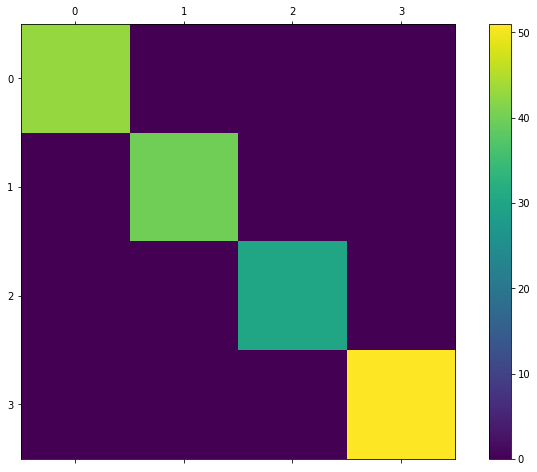

In [18]:
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels, rotation='vertical')
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [0]:
model.save('modelo_casa.h5')

In [0]:
model.save('modelo_80_bud.h5')

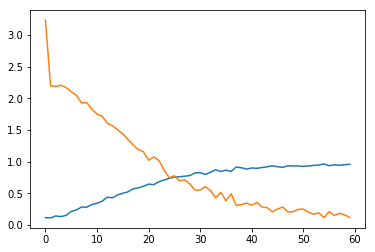

In [0]:
modelaso.history.keys()
plt.plot(modelaso.history['acc'])
plt.plot(modelaso.history['loss'])

In [0]:
matrix = metrics.confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))


NameError: ignored

In [0]:

prob_clasi = model.predict_generator(test_set, steps = len(test_set), max_queue_size=10, workers=1, use_multiprocessing=False, verbose=0)

classes_1 = [np.argmax(prob_clasi[i]) for i in range(len(prob_clasi))]
np.argmax(prob_clasi[0])
test_set.class_indices

{'Amstel': 0,
 'Cruzcampo': 1,
 'Estrella_damm': 2,
 'Estrella_galicia': 3,
 'Franziskaner': 4,
 'Heineken': 5,
 'Mahou': 6,
 'Pilsen_urquell': 7,
 'Sanmiguel': 8}

In [0]:
prob_clasi[0]

array([2.6535126e-06, 9.9942243e-01, 5.2000100e-06, 1.6569491e-08,
       3.4774411e-10, 7.5393345e-08, 5.6436541e-04, 4.7134349e-06,
       5.3717548e-07], dtype=float32)

In [0]:
test_set.class_indices

for c, value in enumerate(test_set.class_indices, 0):
    print(c, value)

# Output:
# 1 apple
# 2 banana
# 3 grapes
# 4 pear

0 Amstel
1 Cruzcampo
2 Estrella_damm
3 Estrella_galicia
4 Franziskaner
5 Heineken
6 Mahou
7 Pilsen_urquell
8 Sanmiguel


In [0]:
prob_clasi[1]

array([1.3871511e-05, 5.6282324e-03, 2.5376714e-06, 3.0902874e-07,
       6.2879082e-04, 3.0368942e-06, 9.1015630e-05, 9.9169987e-01,
       1.9321679e-03], dtype=float32)

TypeError: ignored

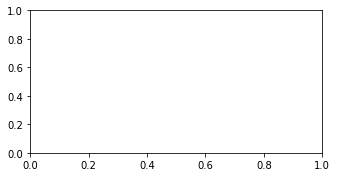

In [0]:
plt.figure(figsize=(200,100))
for i in range(0,32): 
  plt.subplot(32,32,i+1)
  print(prob_clasi[i].max())
  plt.imshow(test_set[0][0][i][:].reshape(300,250))
  #for name in test_set.class_indices:
   # if test_set.class_indices[name]==np.argmax(prob_clasi[i]):
    #  print(name)


In [0]:
type(test_set.class_indices)

dict

In [0]:
img_ancho = 250
img_alto = 300

for category in categories_test:
    path = os.path.join(DataDir_test, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        new_array =cv2.resize(img_array, (img_ancho, img_alto))
        plt.imshow(new_array, cmap ='gray')
        plt.show

# from google.cloud import vision


In [0]:
def detect_labels(path):
    """Detects labels in the file."""
    from google.cloud import vision
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()

    image = vision.types.Image(content=content)

    response = client.label_detection(image=image)
    labels = response.label_annotations
    print('Labels:')

    for label in labels:
        print(label.description)

In [0]:
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    cv2.imshow('my_webcam_gray', gray)
    #cv2.imshow('my_webcam_original', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

# DETECTOR DE IMAGENES (google)

In [0]:
THRESHOLD = 0.8

class_names = {0: 'background',
              1: 'person', 2: 'bicycle', 3: 'car', 4: 'motorcycle', 5: 'airplane', 6: 'bus',
              7: 'train', 8: 'truck', 9: 'boat', 10: 'traffic light', 11: 'fire hydrant',
              13: 'stop sign', 14: 'parking meter', 15: 'bench', 16: 'bird', 17: 'cat',
              18: 'dog', 19: 'horse', 20: 'sheep', 21: 'cow', 22: 'elephant', 23: 'bear',
              24: 'zebra', 25: 'giraffe', 27: 'backpack', 28: 'umbrella', 31: 'handbag',
              32: 'tie', 33: 'suitcase', 34: 'frisbee', 35: 'skis', 36: 'snowboard',
              37: 'sports ball', 38: 'kite', 39: 'baseball bat', 40: 'baseball glove',
              41: 'skateboard', 42: 'surfboard', 43: 'tennis racket', 44: 'bottle',
              46: 'wine glass', 47: 'cup', 48: 'fork', 49: 'knife', 50: 'spoon',
              51: 'bowl', 52: 'banana', 53: 'apple', 54: 'sandwich', 55: 'orange',
              56: 'broccoli', 57: 'carrot', 58: 'hot dog', 59: 'pizza', 60: 'donut',
              61: 'cake', 62: 'chair', 63: 'couch', 64: 'potted plant', 65: 'bed',
              67: 'dining table', 70: 'toilet', 72: 'tv', 73: 'laptop', 74: 'mouse',
              75: 'remote', 76: 'keyboard', 77: 'cell phone', 78: 'microwave', 79: 'oven',
              80: 'toaster', 81: 'sink', 82: 'refrigerator', 84: 'book', 85: 'clock',
              86: 'vase', 87: 'scissors', 88: 'teddy bear', 89: 'hair drier', 90: 'toothbrush'}

model = cv2.dnn.readNetFromTensorflow('frozen_inference_graph.pb',
                                      'ssd_mobilenet_v2_coco_2018_03_29.pbtxt')

cap = cv2.VideoCapture(0)

while True:
    
    ret, frame = cap.read()
    
    model.setInput(cv2.dnn.blobFromImage(frame, size=(300, 300), swapRB=True))
    
    output = model.forward()[0,0,:,:]
    
    for detection in output:
        confidence = detection[2]
        if confidence > THRESHOLD:
            class_id = detection[1]
            class_name = class_names[class_id]
            # print(confidence, class_name)
            
            # rectangles!
            
            box_x=detection[3]
            box_y=detection[4]
            box_width=detection[5]
            box_height=detection[6]
            
            height, width, ch = frame.shape
            
            box_x = detection[3] * width
            box_y = detection[4] * height
            box_width = detection[5] * width
            box_height = detection[6] * height
                                          
            cv2.rectangle(frame, 
                          (int(box_x),
                           int(box_y)),
                          (int(box_width),
                           int(box_height)),
                          (0, 0, 255), 
                          thickness=2)
            
            cv2.putText(frame, 
                        class_name + ' ' + str(round(confidence, 2)),
                        (int(box_x), 
                         int(box_y+.05*height)),
                        cv2.FONT_HERSHEY_SIMPLEX,
                        1,
                        (0, 0, 255))
    
    cv2.imshow('object_detection', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()